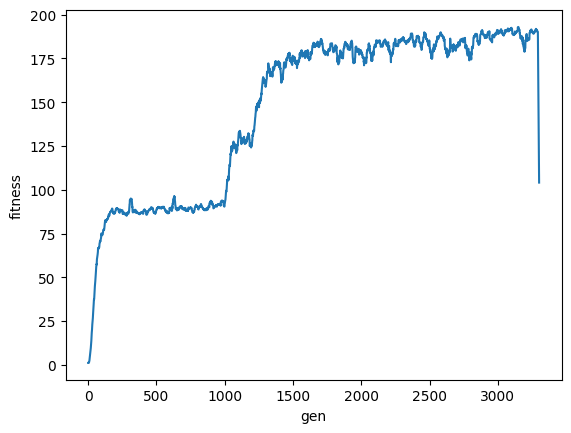

In [26]:

import matplotlib.pyplot as plt
from collections import defaultdict
import csv 
import numpy as np

trial = 1
std_fitness_path = f"/home/magraz/rovers/pyrover_domain/experiments/results/trial_{trial}_multi_decay_gru_teaming/fitness.csv"
hpc_fitness_path = f"/home/magraz/rovers/pyrover_domain/experiments/results/hpc/trial_{trial}/fitness_teaming_{trial}.csv"
 
fitness_path =std_fitness_path
dd=defaultdict(list)

def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size) 
    return np.convolve(interval, window, 'same')

with open(fitness_path,'r') as csvfile: 
    for line in csv.DictReader(csvfile):
        for key, value in line.items():
            if key != '' and value != '' and value != None and not isinstance(value, list):
                dd[key].append(float(value))

fig=plt.figure()
ax=fig.add_subplot(111)

y_av = movingaverage(dd["team_fitness_aggregated"], 20) 
 
ax.plot(dd["generation"], y_av)

ax.set_xlabel('gen') 
ax.set_ylabel('fitness') 

plt.show() 